In [1]:
import math
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pyreadr
from sklearn.preprocessing import LabelEncoder

# Preprocessing

In [2]:
data_dir = "./output/"
rna_path = data_dir + "model101_rna.tsv"
dna_path = data_dir + "model101_dna.tsv"
merge_path = data_dir + "model101_merge.tsv"

colnames = ["names"]
dim = 20
for i in range(1, dim+1):
    colnames.append("dim"+str(i))
colnames[-5:]

['dim16', 'dim17', 'dim18', 'dim19', 'dim20']

In [3]:
def prep(path, header=None, sep="\t"):
    df = pd.read_csv(path, header=None, sep="\t")
    df.columns = colnames
    df = df.set_index('names')
    return df

def getCells(df):
    return df[df.index.str.startswith("#")]

def check_sanity(df):
    print("shape of data is", df.shape)
    missing_vals = df.isnull().sum() != 0
    print("columns that have missing values include", df.columns[missing_vals])

In [4]:
rna_df = prep(rna_path)
rna_cell_df = getCells(rna_df)
dna_df = prep(dna_path)
dna_cell_df = getCells(dna_df)
merge_df = prep(merge_path)
merge_cell_df = getCells(merge_df)
for df in (rna_df, dna_df, merge_df):
    check_sanity(df)
for df in (rna_cell_df, dna_cell_df, merge_cell_df):
    check_sanity(df)

shape of data is (20109, 20)
columns that have missing values include Index([], dtype='object')
shape of data is (70617, 20)
columns that have missing values include Index([], dtype='object')
shape of data is (85645, 20)
columns that have missing values include Index([], dtype='object')
shape of data is (5081, 20)
columns that have missing values include Index([], dtype='object')
shape of data is (5081, 20)
columns that have missing values include Index([], dtype='object')
shape of data is (5081, 20)
columns that have missing values include Index([], dtype='object')


In [5]:
meta = pyreadr.read_r("./data/P0BrainCortex_SNAREseq_metadata_full.rds")[None]
meta["id"] = "#" + meta["Barcode"].astype(str)

# le = LabelEncoder()
# meta["label"] = le.fit_transform(meta["Ident"])
meta["label"] = meta.Ident.astype(int)
meta = meta.sort_values(by='label')
meta = meta.set_index("id")

print(meta.shape)
meta.head()

(5081, 10)


,Batch,Barcode,Reads,Peaks,FRiP,UMI,Gene,Ident,IdentChar,label
id,,,,,,,,,,
#GGTCTAGCCTTT,12C,GGTCTAGCCTTT,5361,1823,0.688544,268,216,1.0,Ex23_Cux1,1
#CTAATCTAGGCT,12A,CTAATCTAGGCT,12646,1897,0.725614,278,229,1.0,Ex23_Cux1,1
#TCTTTCGTAGCT,12B,TCTTTCGTAGCT,9639,2379,0.614106,257,219,1.0,Ex23_Cux1,1
#TAAATTCGTCGG,12B,TAAATTCGTCGG,9659,1866,0.624895,374,296,1.0,Ex23_Cux1,1
#GGCTTAAATGTC,12B,GGCTTAAATGTC,9726,1926,0.589133,306,248,1.0,Ex23_Cux1,1


In [6]:
meta.IdentChar.unique()

array(['Ex23_Cux1', 'Ex6_Tle4', 'Ex345_Foxp1', 'IP_Eomes', 'RG',
       'Ex4_Tenm3', 'Ex5_Crmp1', 'Ex45_Galntl6', 'In_1', 'In_2',
       'IP_Hmgn2', 'Ex56_Epha6', 'Ex23_Cntn2', 'IP_Gadd45g', 'CR', 'Endo',
       'Peri', 'OPC', 'Mic'], dtype=object)

In [7]:
print("total number of classes:", len(meta["label"].unique()))

rna_cell_df2 = rna_cell_df.join(meta)
rna_cell_df2 = rna_cell_df2.sort_values(by='label')
print("number of classes in RNA data", len(rna_cell_df2["label"].unique()))

dna_cell_df2 = dna_cell_df.join(meta)
dna_cell_df2 = dna_cell_df2.dropna()
dna_cell_df2["label"] = dna_cell_df2["label"].astype(int)
dna_cell_df2 = dna_cell_df2.sort_values(by='label')
print("number of classes in DNA data",len(dna_cell_df2["label"].unique()))

merge_cell_df2 = merge_cell_df.join(meta)
merge_cell_df2 = merge_cell_df2.dropna()
merge_cell_df2["label"] = merge_cell_df2["label"].astype(int)
merge_cell_df2 = merge_cell_df2.sort_values(by='label')
print("number of classes in combined data",len(merge_cell_df2["label"].unique()))

total number of classes: 19
number of classes in RNA data 19
number of classes in DNA data 19
number of classes in combined data 19


In [39]:
merge_cell_df2.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,Batch,Barcode,Reads,Peaks,FRiP,UMI,Gene,Ident,IdentChar,label
names,,,,,,,,,,,,,,,,,,,,,
#CGGCCGTACACA,0.000180,0.000145,-0.000142,0.000092,0.000065,-0.000015,-0.000275,-0.000031,-0.000082,-0.000063,...,12C,CGGCCGTACACA,9818,1784,0.665086,586,454,1.0,Ex23_Cux1,1
#GGAGACACAGTG,0.000130,0.000097,-0.000034,0.000040,-0.000050,0.000039,-0.000236,-0.000036,-0.000125,0.000053,...,12B,GGAGACACAGTG,12820,3422,0.665110,275,250,1.0,Ex23_Cux1,1
#CGACTACGAGGC,0.002807,0.001101,-0.000213,-0.000464,-0.003064,-0.001359,-0.007965,-0.000787,-0.003513,-0.001002,...,12B,CGACTACGAGGC,22212,3093,0.594508,550,428,1.0,Ex23_Cux1,1
#CCAACGTGGAGA,0.000395,0.000237,-0.000321,-0.000104,-0.000111,0.000272,-0.000637,-0.000151,-0.000702,0.000082,...,19A,CCAACGTGGAGA,9581,2408,0.482476,664,586,1.0,Ex23_Cux1,1
#CAGGCTTATTTC,0.000090,0.000076,0.000003,-0.000008,0.000073,0.000018,-0.000238,-0.000105,-0.000177,-0.000030,...,12C,CAGGCTTATTTC,18927,4693,0.684917,384,318,1.0,Ex23_Cux1,1


# Clustering

In [8]:
import phenograph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

The rule of thumb is:  
- Use ARI when the ground truth clustering has large equal sized clusters  
- Usa AMI when the ground truth clustering is unbalanced and there exist small clusters  

In [14]:
# scaler = StandardScaler()
# rna_cell_scaled2 = scaler.fit_transform(rna_cell_df2.iloc[:, :-4])
# dna_cell_scaled2 = scaler.fit_transform(dna_cell_df2.iloc[:, :-4])
# merge_cell_scaled2 = scaler.fit_transform(merge_cell_df2.iloc[:, :-4])

In [16]:
def getConfMat(df, community):
    print("The AMI score is", adjusted_mutual_info_score(df.Ident, community))
    conf_mat = pd.crosstab(df.Ident, community)
    conf_mat = conf_mat.div(conf_mat.sum(axis=1), axis=0)
    return conf_mat

def plotConfMat(conf_mat, figsize=(15,5), title="", fontsize=20, xlabel="Cluster"):
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(conf_mat, ax=ax, annot=True, cbar=False, cmap=sns.diverging_palette(240,10,as_cmap=True), 
                     fmt='.1%', vmax=1)
    cbar = ax.figure.colorbar(ax.collections[0])
    cbar.set_ticks([0, .25, .5, 0.75, 1.])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(xlabel)

## Kmeans

In [31]:
# from sklearn.cluster import KMeans
# kmeans23 = KMeans(n_clusters=23)
# y_kmeans_rna = kmeans23.fit_predict(rna_cell_scaled2)
# y_kmeans_dna = kmeans23.fit_predict(dna_cell_scaled2)
# y_kmeans_merge = kmeans23.fit_predict(merge_cell_scaled2)

## Phenograph

In [17]:
def phenographInfo(arr):
    print("data size", arr.shape)
    print("different clusters and their sizes", np.unique(arr, return_counts=True))

In [39]:
# def evalCluster(ytrue, ycluster, sort=True):
#     group_df = pd.concat([ytrue.Ident.reset_index(drop=True), pd.Series(ycluster)], axis=1, ignore_index=True)
#     group_df.columns = ['true_label', 'cluster']
#     group_res = group_df.groupby(['true_label','cluster'])\
#         .agg({'cluster': ['count']})
#     if not sort:
#         return group_res
#     group_sort = group_res.reset_index().sort_values(['true_label',('cluster', 'count')], ascending=[True, False])
#     with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#         print(group_sort)
#     return group_sort

In [18]:
communities_rna, graph_rna, Q_rna = phenograph.cluster(data=rna_cell_df2.iloc[:, :-10], k=30, primary_metric='cosine')
phenographInfo(communities_rna)

Finding 30 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 1.2216429710388184 seconds
Jaccard graph constructed in 4.759027719497681 seconds
Wrote graph to binary file in 0.48735904693603516 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.43155
After 3 runs, maximum modularity is Q = 0.440349
Louvain completed 23 runs in 11.382406949996948 seconds
Sorting communities by size, please wait ...
PhenoGraph complete in 20.396607398986816 seconds
data size (5081,)
different clusters and their sizes (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1003,  898,  688,  525,  507,  459,  317,  280,  264,  140],
      dtype=int64))


The AMI score is 0.17109592751839478


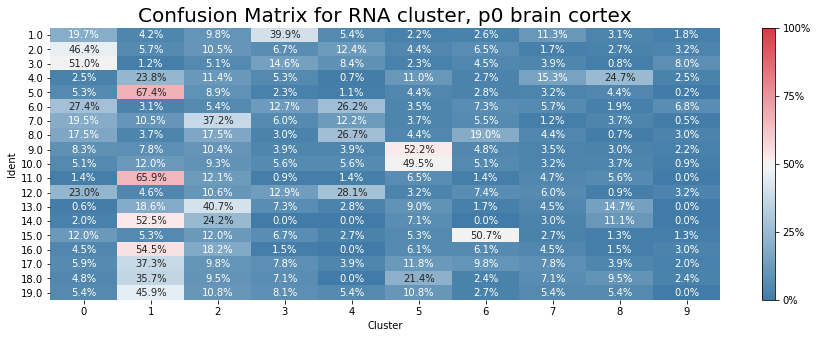

In [19]:
conf_mat_rna = getConfMat(rna_cell_df2, communities_rna)
plotConfMat(conf_mat_rna, title="Confusion Matrix for RNA cluster, p0 brain cortex")

In [20]:
communities_dna, graph_dna, Q_dna = phenograph.cluster(data=dna_cell_df2.iloc[:, :-10], k=30, primary_metric='cosine')
phenographInfo(communities_dna)

Finding 30 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 1.1940946578979492 seconds
Jaccard graph constructed in 5.078535318374634 seconds
Wrote graph to binary file in 0.5754618644714355 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.683453
After 4 runs, maximum modularity is Q = 0.687856
Louvain completed 24 runs in 9.033118486404419 seconds
Sorting communities by size, please wait ...
PhenoGraph complete in 17.80045223236084 seconds
data size (5080,)
different clusters and their sizes (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), array([1261,  713,  496,  494,  433,  414,  375,  228,  220,  209,   98,
         56,   56,   27], dtype=int64))


The AMI score is 0.6601193163087579


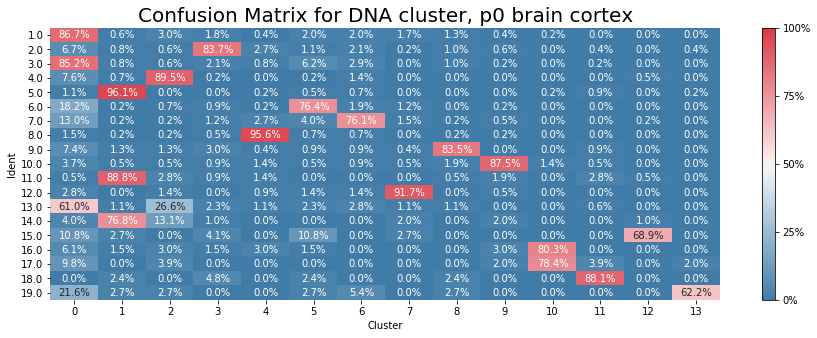

In [21]:
conf_mat_dna = getConfMat(dna_cell_df2, communities_dna)
plotConfMat(conf_mat_dna, title="Confusion Matrix for DNA cluster, p0 brain cortex")

In [22]:
communities_merge, graph_merge, Q_merge = phenograph.cluster(data=merge_cell_df2.iloc[:, :-10], k=30, primary_metric='cosine')
phenographInfo(communities_merge)

Finding 30 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 1.1264948844909668 seconds
Jaccard graph constructed in 4.007028341293335 seconds
Wrote graph to binary file in 0.6630916595458984 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.73949
After 2 runs, maximum modularity is Q = 0.742177
Louvain completed 22 runs in 6.881100416183472 seconds
Sorting communities by size, please wait ...
PhenoGraph complete in 20.220348358154297 seconds
data size (5081,)
different clusters and their sizes (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([1534,  754,  600,  548,  415,  368,  248,  216,  212,  121,   65],
      dtype=int64))


The AMI score is 0.6660923024926217


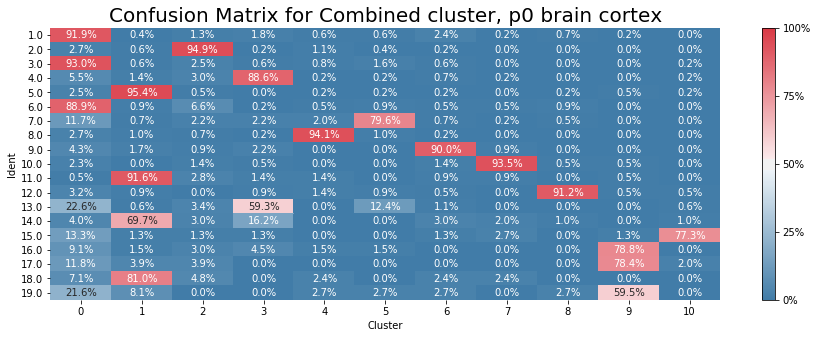

In [23]:
conf_mat_merge = getConfMat(merge_cell_df2, communities_merge)
plotConfMat(conf_mat_merge, title="Confusion Matrix for Combined cluster, p0 brain cortex")

# 2D Visualization

In [9]:
import umap
from sklearn.manifold import TSNE

In [10]:
rna_umap = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric='cosine').fit_transform(rna_cell_df2.iloc[:, :-10])
dna_umap = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric='cosine').fit_transform(dna_cell_df2.iloc[:, :-10])
merge_umap = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric='cosine').fit_transform(merge_cell_df2.iloc[:, :-10])

In [33]:
rna_tsne = TSNE(n_components=2, metric='cosine').fit_transform(rna_cell_df2.iloc[:, :-10])
dna_tsne = TSNE(n_components=2, metric='cosine').fit_transform(dna_cell_df2.iloc[:, :-10])
merge_tsne = TSNE(n_components=2, metric='cosine').fit_transform(merge_cell_df2.iloc[:, :-10])

In [11]:
color24 = ["#000000", "#737373", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#FFD400", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#0089A3", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF0000"]

In [210]:
all_classes = list(meta.IdentChar.unique())
def vis2d(ax, x, y, label_num, labels=all_classes, alpha=0.7, s=10, title="visualization", xlab="x", ylab="y",
          cmap=matplotlib.colors.ListedColormap(color24), vis=False, legend=True):
    points = ax.scatter(x, y, c=label_num, label=label_num, edgecolor='none', alpha=alpha, s=s, cmap=cmap)
    ax.spines["top"].set_visible(vis)
    ax.spines["right"].set_visible(vis)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title, fontsize=15)

    if legend:
        #   *points.legend_elements()
        ax.legend(handles=points.legend_elements(num=len(labels)+1)[0], labels=labels, 
                  title="Classes", loc='center left', bbox_to_anchor=(1, 0.5))    

def vis2d_label(ax, df, labels=all_classes, alpha=0.4, s=10, title="visualization", xlab="x", ylab="y", vis=False, legend=True):
    length = len(labels)
    for i, label in enumerate(labels):
        ax.scatter(x=df.loc[df['classes'] == label, 'umap1'], y=df.loc[df['classes'] == label, 'umap2'], 
                   color=color24[i], edgecolor='none', alpha=alpha, s=s)
        ax.annotate(i, df.loc[df['classes']==label,['umap1','umap2']].median(),
                 horizontalalignment='center',verticalalignment='center',
                 size=12, weight='bold', color='white', backgroundcolor=color24[i])
        
    ax.spines["top"].set_visible(vis)
    ax.spines["right"].set_visible(vis)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title, fontsize=15)
    if legend:
        labels_copy = []
        if labels == all_classes:
            for i in range(length):
                labels_copy.append(str(i) + " " + labels[i])
        ax.legend(labels_copy, title="Classes", loc='center left', bbox_to_anchor=(1, 0.5), ncol=math.ceil(length/6))

In [13]:
def umap_concat(umap_arr, cell_df, true_label=True):
    df = pd.concat([pd.DataFrame(umap_arr), cell_df.label.reset_index().label], axis=1)
    df.columns = ['umap1', 'umap2', 'label']
    if true_label:
        df["classes"] = cell_df.IdentChar.reset_index().IdentChar
    else:
        df["classes"] = df.label
    return df

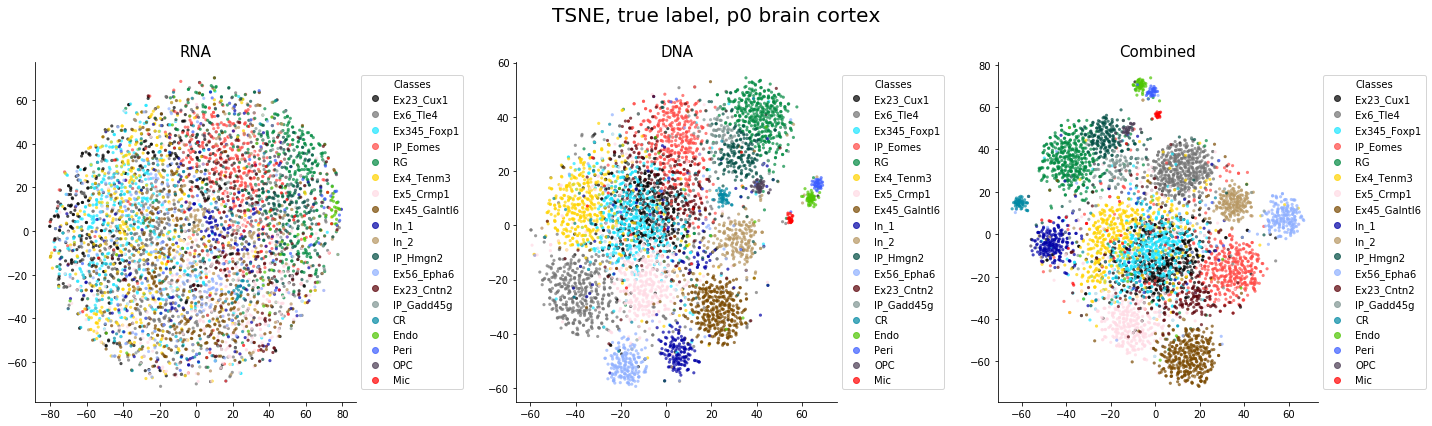

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle("TSNE, true label, p0 brain cortex", fontsize=20)
ax1 = axes[0]
vis2d(ax1, rna_tsne, rna_cell_df2["label"], title="RNA")
ax2 = axes[1]
vis2d(ax2, dna_tsne, dna_cell_df2["label"], title="DNA")
ax3 = axes[2]
vis2d(ax3, merge_tsne, merge_cell_df2["label"], title="Combined")
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.5)

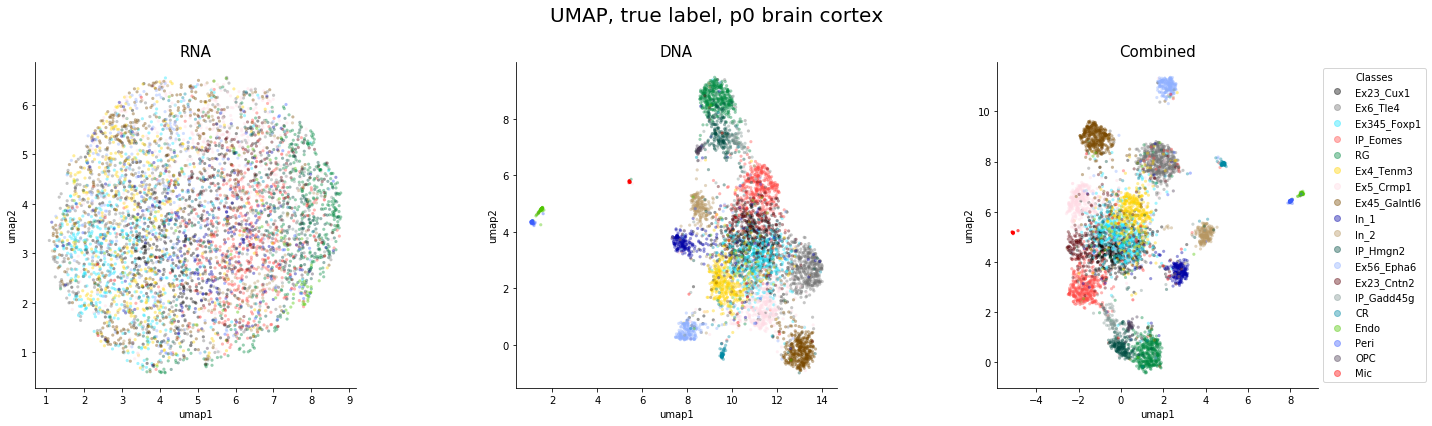

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle("UMAP, true label, p0 brain cortex", fontsize=20)
vis2d(axes[0], rna_umap[:,0], rna_umap[:,1], rna_cell_df2["label"], title="RNA", xlab="umap1", ylab="umap2", legend=False)
vis2d(axes[1], dna_umap[:,0], dna_umap[:,1], dna_cell_df2["label"], title="DNA", xlab="umap1", ylab="umap2", legend=False)
vis2d(axes[2], merge_umap[:,0], merge_umap[:,1], merge_cell_df2["label"], title="Combined", xlab="umap1", ylab="umap2")
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.5)

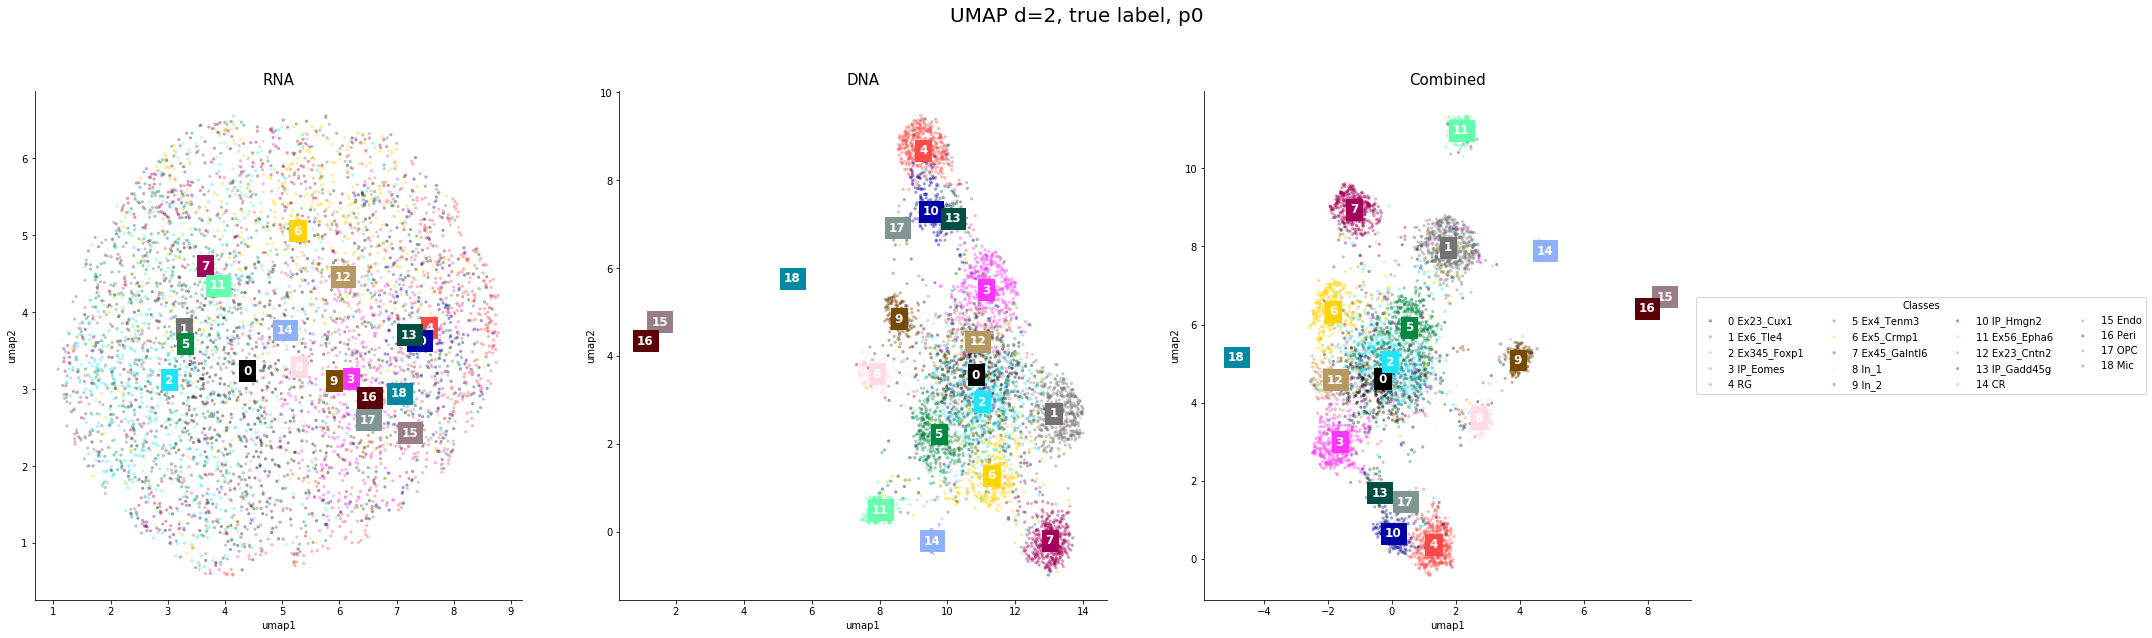

In [15]:
rna_umap2_concat = umap_concat(rna_umap, rna_cell_df2)
dna_umap2_concat = umap_concat(dna_umap, dna_cell_df2)
merge_umap2_concat = umap_concat(merge_umap, merge_cell_df2)

fig, axes = plt.subplots(1, 3, figsize=(30, 9))
fig.suptitle("UMAP d=2, true label, p0", fontsize=20)
vis2d_label(axes[0], rna_umap2_concat, title="RNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[1], dna_umap2_concat, title="DNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[2], merge_umap2_concat, title="Combined", xlab="umap1", ylab="umap2")
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.2)

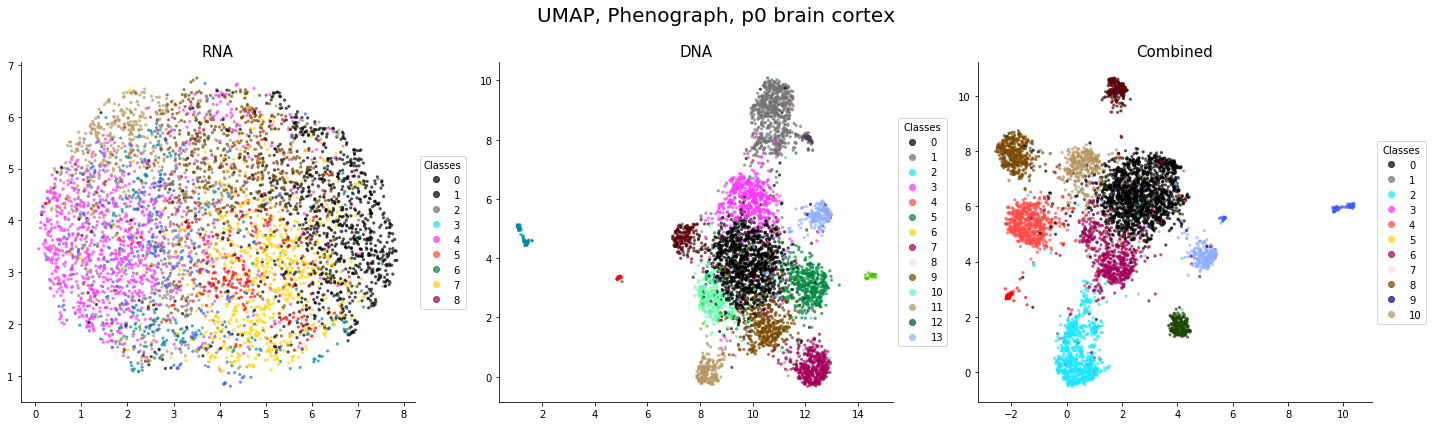

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle("UMAP, Phenograph, p0 brain cortex", fontsize=20)
ax1 = axes[0]
vis2d(ax1, rna_umap, communities_rna, list(np.unique(communities_rna)), title="RNA")
ax2 = axes[1]
vis2d(ax2, dna_umap, communities_dna, list(np.unique(communities_dna)), title="DNA")
ax3 = axes[2]
vis2d(ax3, merge_umap, communities_merge, list(np.unique(communities_merge)), title="Combined")
fig.tight_layout()
fig.subplots_adjust(top=0.85)

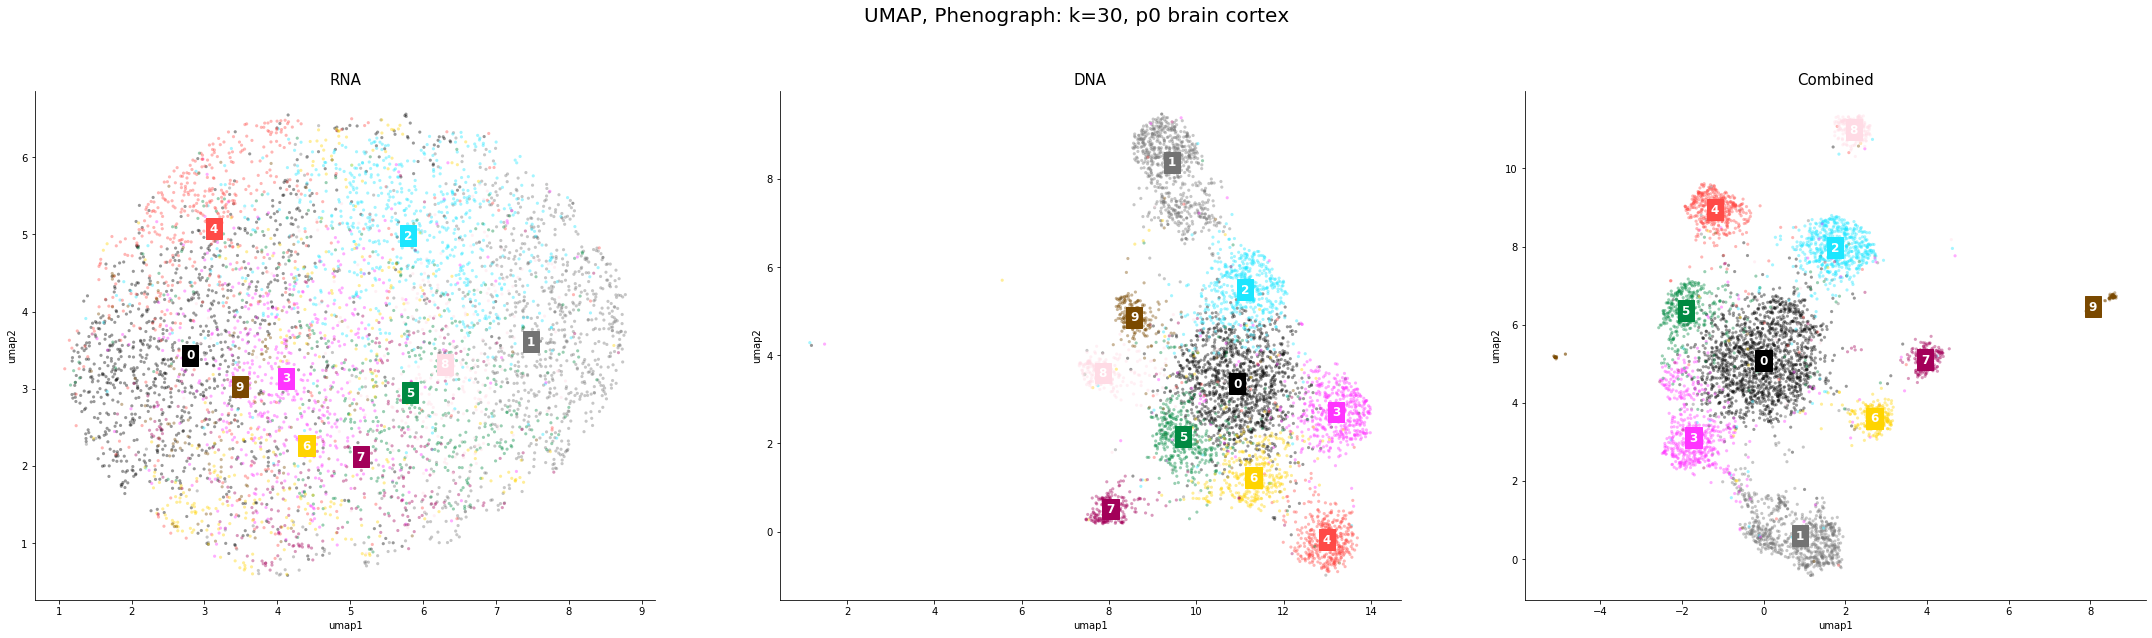

In [24]:
rna_umap2_pheno_concat = umap_concat(rna_umap, pd.DataFrame(communities_rna, columns=['label']), true_label=False)
dna_umap2_pheno_concat = umap_concat(dna_umap, pd.DataFrame(communities_dna, columns=['label']), true_label=False)
merge_umap2_pheno_concat = umap_concat(merge_umap, pd.DataFrame(communities_merge, columns=['label']), true_label=False)

fig, axes = plt.subplots(1, 3, figsize=(30,9))
fig.suptitle("UMAP, Phenograph: k=30, p0 brain cortex", fontsize=20)
labels = list(np.unique(communities_rna))
vis2d_label(axes[0], rna_umap2_pheno_concat, labels=labels, title="RNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[1], dna_umap2_pheno_concat, labels=labels, title="DNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[2], merge_umap2_pheno_concat, labels=labels, title="Combined", xlab="umap1", ylab="umap2", legend=False)
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.2)

# Palantir

In [25]:
import palantir

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [49]:
rna_cell_df2.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,Batch,Barcode,Reads,Peaks,FRiP,UMI,Gene,Ident,IdentChar,label
names,,,,,,,,,,,,,,,,,,,,,
#CAAAAGAGGTCT,0.040923,0.017586,-0.044730,0.000073,-0.008443,0.033536,0.075566,-0.062515,-0.077675,0.008179,...,12D,CAAAAGAGGTCT,16115,2867,0.697408,557,417,1.0,Ex23_Cux1,1
#TCGAGCCACGTC,-0.085079,-0.175469,-0.175177,0.211147,-0.089777,0.006439,0.216059,-0.233524,0.054314,0.022954,...,12C,TCGAGCCACGTC,15602,3389,0.669671,542,456,1.0,Ex23_Cux1,1
#AGCCCGGGAGTA,-0.038474,-0.032363,0.054678,-0.003128,-0.007058,0.010252,-0.016619,0.041855,0.015378,0.074810,...,12D,AGCCCGGGAGTA,19538,4373,0.715992,838,640,1.0,Ex23_Cux1,1
#TAGAGCAACGGA,0.012629,-0.202258,0.182741,-0.347577,-0.113924,-0.299181,0.032071,-0.073128,-0.041665,0.127394,...,12D,TAGAGCAACGGA,10521,2276,0.606957,373,324,1.0,Ex23_Cux1,1
#CTACCTGGTCAG,0.098604,-0.039743,0.203831,-0.109571,-0.036650,-0.003902,-0.012310,-0.081063,0.058210,-0.018514,...,12D,CTACCTGGTCAG,8587,2358,0.667626,245,208,1.0,Ex23_Cux1,1


In [222]:
selected = ['IP_Hmgn2', 'IP_Gadd45g', 'IP_Eomes', 'Ex23_Cntn2', 'Ex23_Cux1']
def select_pseudo(cell_df, select_list, col_discard=10, class_col=2, label_col=1):
    pseudo_df = cell_df[cell_df.IdentChar.isin(select_list)].iloc[:, :-col_discard]
    pseudo_df2 = pseudo_df.copy()
    pseudo_df2['Classes'] = cell_df[cell_df.IdentChar.isin(select_list)].iloc[:, -class_col:-class_col+1]
    pseudo_df2['label'] = cell_df[cell_df.IdentChar.isin(select_list)].iloc[:,-label_col]
    print("shape of selected cell dataframe is", pseudo_df2.shape)
    return pseudo_df, pseudo_df2

In [223]:
pseudo_rna, pseudo_rna2 = select_pseudo(rna_cell_df2, selected)
pseudo_dna, pseudo_dna2 = select_pseudo(dna_cell_df2, selected)
pseudo_rna2.head()

shape of selected cell dataframe is (1469, 22)
shape of selected cell dataframe is (1469, 22)


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim13,dim14,dim15,dim16,dim17,dim18,dim19,dim20,Classes,label
names,,,,,,,,,,,,,,,,,,,,,
#CAAAAGAGGTCT,0.040923,0.017586,-0.044730,0.000073,-0.008443,0.033536,0.075566,-0.062515,-0.077675,0.008179,...,0.068018,-0.029884,0.021718,-0.031815,0.006762,0.081396,0.174082,0.057814,Ex23_Cux1,1
#TCGAGCCACGTC,-0.085079,-0.175469,-0.175177,0.211147,-0.089777,0.006439,0.216059,-0.233524,0.054314,0.022954,...,-0.147323,0.325832,0.232632,-0.088442,-0.056547,-0.137657,0.241310,0.128549,Ex23_Cux1,1
#AGCCCGGGAGTA,-0.038474,-0.032363,0.054678,-0.003128,-0.007058,0.010252,-0.016619,0.041855,0.015378,0.074810,...,-0.091868,0.035507,-0.027585,-0.063699,-0.145702,-0.037647,0.076801,0.071955,Ex23_Cux1,1
#TAGAGCAACGGA,0.012629,-0.202258,0.182741,-0.347577,-0.113924,-0.299181,0.032071,-0.073128,-0.041665,0.127394,...,0.287080,-0.172378,0.125896,-0.100764,-0.042150,-0.055825,0.332538,0.433285,Ex23_Cux1,1
#CTACCTGGTCAG,0.098604,-0.039743,0.203831,-0.109571,-0.036650,-0.003902,-0.012310,-0.081063,0.058210,-0.018514,...,-0.129375,0.002858,0.010434,0.126999,-0.017703,0.042343,0.072073,0.045119,Ex23_Cux1,1


In [225]:
# normalized each row by its length (L-2 norm)
def normalize(df):
    df2 = df.copy()
    df2["len"] = np.sqrt(np.sum(df**2, axis=1))
    df2 = df2.div(df2.len, axis=0)
    df2.drop(['len'], axis=1, inplace=True)
    return df2

def run_palantir(pseudo_df, n_comp=15):
    pseudo_normalized = normalize(pseudo_df)
    dm_res = palantir.utils.run_diffusion_maps(pseudo_df_normalized, n_components=n_comp)
    ms_data = palantir.utils.determine_multiscale_space(dm_res)
    print("The shape of ms_data is", ms_data.shape)
    tsne = palantir.utils.run_tsne(ms_data)
    print("The shape of tsne is", tsne.shape)
    return pseudo_normalized, dm_res, ms_data, tsne

In [226]:
pseudo_norm_rna, dm_res_rna, ms_data_rna, tsne_rna = run_palantir(pseudo_rna)

Determing nearest neighbor graph...


C:\Users\CSY\anaconda3\lib\site-packages\palantir\utils.py:43: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  kNN = temp.uns["neighbors"]["distances"]


The shape of ms_data is (1469, 1)
The shape of tsne is (1469, 2)


In [228]:
pseudo_norm_dna, dm_res_dna, ms_data_dna, tsne_dna = run_palantir(pseudo_dna)

Determing nearest neighbor graph...


C:\Users\CSY\anaconda3\lib\site-packages\palantir\utils.py:43: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  kNN = temp.uns["neighbors"]["distances"]


The shape of ms_data is (1469, 1)
The shape of tsne is (1469, 2)


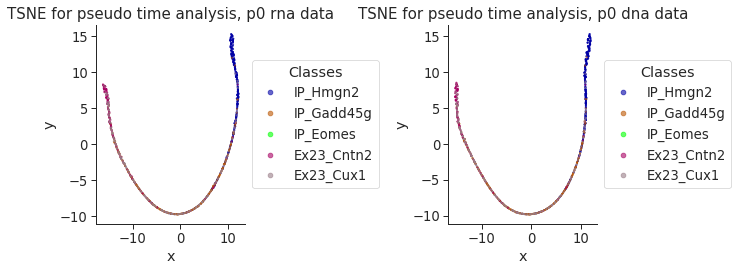

In [236]:
color_selected = ["#0000A6","#BB5500","#00FF00","#A70062","#997D87"]
fig, ax = plt.subplots(1, 2, figsize=(10,4))
vis2d(ax[0], tsne_rna["x"], tsne_rna["y"], label_num=pseudo_rna2.label, labels=selected, alpha=0.6, s=4,
      title="TSNE for pseudo time analysis, p0 rna data", cmap=matplotlib.colors.ListedColormap(color_selected))
vis2d(ax[1], tsne_dna["x"], tsne_dna["y"], label_num=pseudo_dna2.label, labels=selected, alpha=0.6, s=4,
      title="TSNE for pseudo time analysis, p0 dna data", cmap=matplotlib.colors.ListedColormap(color_selected))
fig.tight_layout()

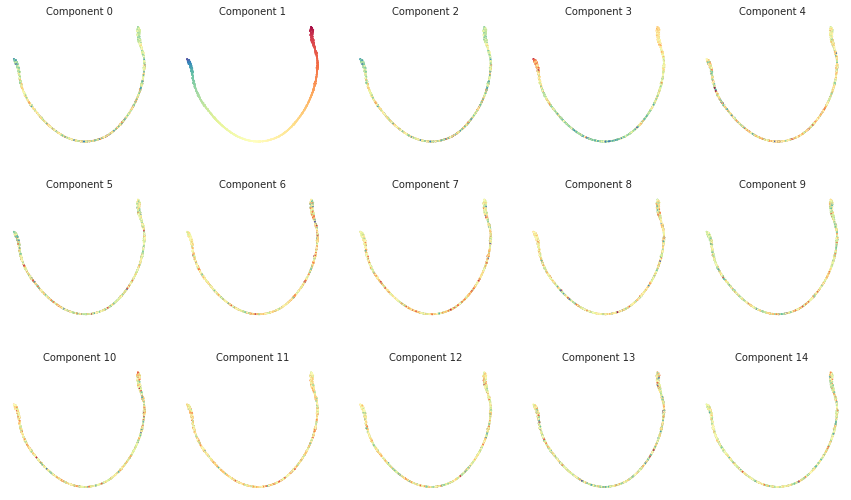

In [233]:
palantir.plot.plot_diffusion_components(tsne_rna, dm_res_rna)

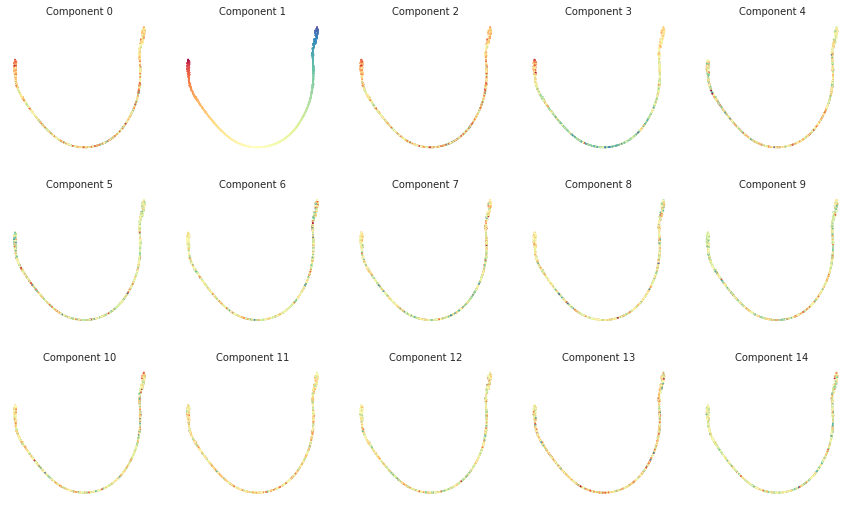

In [237]:
palantir.plot.plot_diffusion_components(tsne_dna, dm_res_dna)

In [238]:
def find_start(tsne_df):
    p = tsne_df[tsne_df["y"] == max(tsne_df["y"])].index
    return p

In [241]:
rna_start = find_start(tsne_rna)
print("the starting cell for rna is", rna_start)
dna_start = find_start(tsne_dna)
print("the starting cell for dna is", dna_start)

the starting cell for rna is Index(['#GCGGGATAAGGA'], dtype='object', name='names')
the starting cell for dna is Index(['#GCGGGATAAGGA'], dtype='object', name='names')


In [242]:
start_cell = rna_start
pr_res_rna = palantir.core.run_palantir(ms_data_rna, start_cell, num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0039727171262105305 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.5290226817131043 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


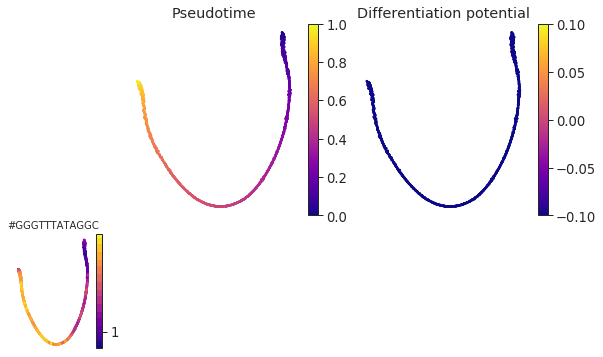

In [243]:
palantir.plot.plot_palantir_results(pr_res_rna, tsne_rna)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0033674359321594237 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.02695148785909017 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


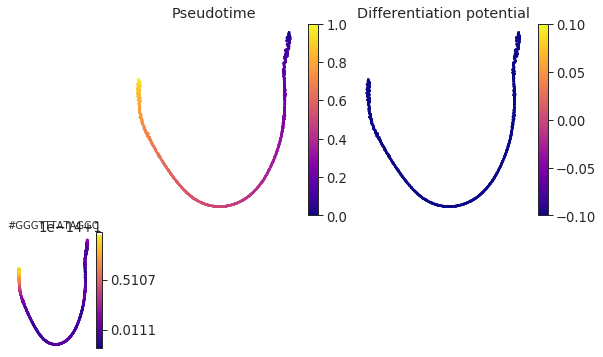

In [244]:
pr_res_dna = palantir.core.run_palantir(ms_data_dna, start_cell, num_waypoints=500)
palantir.plot.plot_palantir_results(pr_res_dna, tsne_dna)